# Train Data

##Importing Libraries and train data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("train_label.csv", header= None)

In [ ]:
df1.head()

,0
0,504
1,5
2,139
3,209
4,184


###Shape of the train data

In [ ]:
print(df.shape)
print(df1.shape)

(8708, 9)
(8708, 1)


In [ ]:
df['total_bookings']=df1

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


### Checking the type of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        8708 non-null   object 
 1   season          8708 non-null   object 
 2   holiday         8708 non-null   int64  
 3   workingday      8708 non-null   int64  
 4   weather         8708 non-null   object 
 5   temp            8708 non-null   float64
 6   atemp           8708 non-null   float64
 7   humidity        8708 non-null   int64  
 8   windspeed       8708 non-null   float64
 9   total_bookings  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


Continous data is in float and categorical is in object!

###Checking empty and duplicate values

In [ ]:
df.isna().any()

datetime          False
season            False
holiday           False
workingday        False
weather           False
temp              False
atemp             False
humidity          False
windspeed         False
total_bookings    False
dtype: bool

In [ ]:
df.duplicated().any()

False

## Extracting datetime features

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df["weekday"]= df['datetime'].dt.day_name()
df["dates"] =df['datetime'].dt.date
df["hour"]= df['datetime'].dt.hour
df["month"]=df['datetime'].dt.month_name()

In [ ]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings,weekday,dates,hour,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979,504,Wednesday,2012-05-02,19,May


In [ ]:
df=df[['datetime', 'dates','hour','weekday', 'month', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',	'windspeed','total_bookings']]

In [ ]:
df.head(2)

,datetime,dates,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,2012-05-02 19:00:00,2012-05-02,19,Wednesday,May,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,2012-09-05,4,Wednesday,September,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5


##Outliers and omitting them!

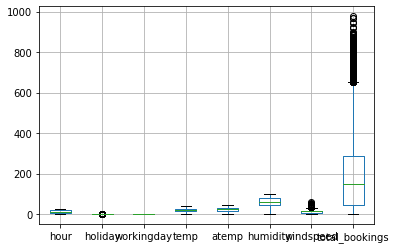

In [ ]:
df.boxplot()
plt.show()

In [ ]:
Q1=df['total_bookings'].quantile(0.25)
Q3=df['total_bookings'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
outliers=df[(df['total_bookings']>(Q3+1.5*IQR)) | (df['total_bookings']<(Q1-1.5*IQR))]

In [ ]:
df.drop(list(outliers.index), axis=0, inplace=True)

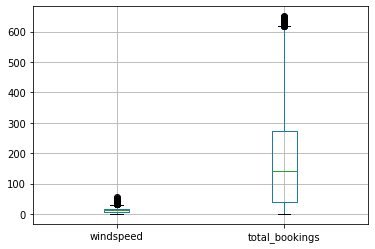

In [ ]:
df.boxplot(['windspeed','total_bookings'])
plt.show()

##Correlation Analysis!

In [ ]:
corr=df.corr()

In [ ]:
corr

,hour,holiday,workingday,temp,atemp,humidity,windspeed,total_bookings
hour,1.000000,0.005392,-0.003357,0.134702,0.130159,-0.266331,0.131759,0.425427
holiday,0.005392,1.000000,-0.250402,0.002621,-0.002768,-0.006133,0.007395,0.010235
workingday,-0.003357,-0.250402,1.000000,0.026092,0.020552,-0.011184,0.015937,-0.023420
temp,0.134702,0.002621,0.026092,1.000000,0.985214,-0.052052,-0.031265,0.389198
atemp,0.130159,-0.002768,0.020552,0.985214,1.000000,-0.030614,-0.073184,0.386209
humidity,-0.266331,-0.006133,-0.011184,-0.052052,-0.030614,1.000000,-0.322381,-0.312485
windspeed,0.131759,0.007395,0.015937,-0.031265,-0.073184,-0.322381,1.000000,0.102777
total_bookings,0.425427,0.010235,-0.023420,0.389198,0.386209,-0.312485,0.102777,1.000000


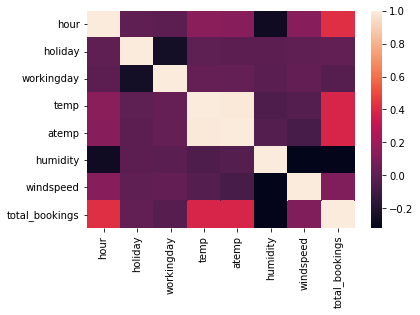

In [ ]:
sns.heatmap(corr)
plt.show()

From above plot and table, it can be observed that 
1. "hours" and number_of_booking is significantly &positively correlated with each other. (0.425)
2. Humidity and number of bookings is negatively correlated (-0.266)
3. atemp & temp are strongly correlated with each other!   (0.98) (This might be the case of multi-correlation.)
4. Other variables are very weakly correlated with bookings & each other!

##Probability plot of total bookings

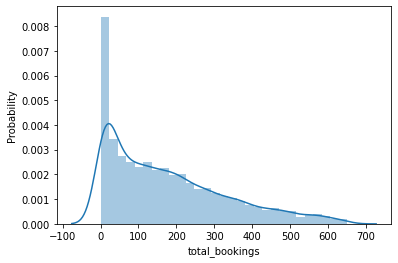

In [ ]:
sns.distplot(df['total_bookings'], norm_hist=True)
plt.ylabel('Probability')
plt.show()

## Various Scatter Plots

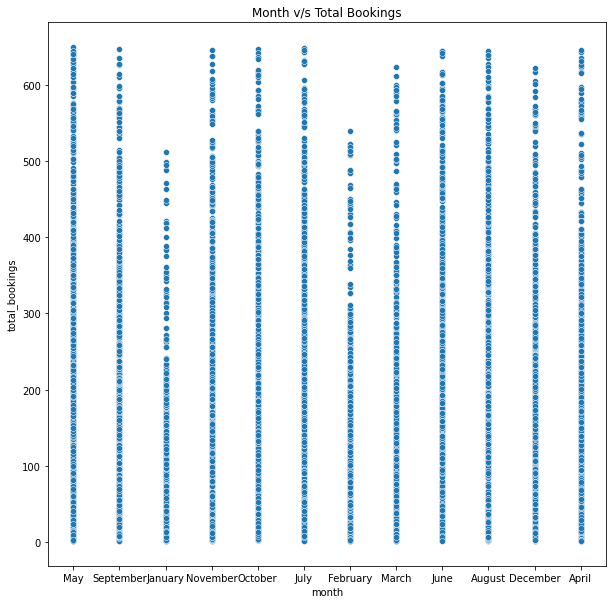

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='month', y='total_bookings')
plt.title("Month v/s Total Bookings")
plt.show()

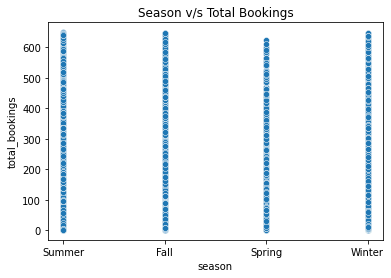

In [ ]:

sns.scatterplot(data=df, x='season', y='total_bookings')
plt.title("Season v/s Total Bookings")
plt.show()

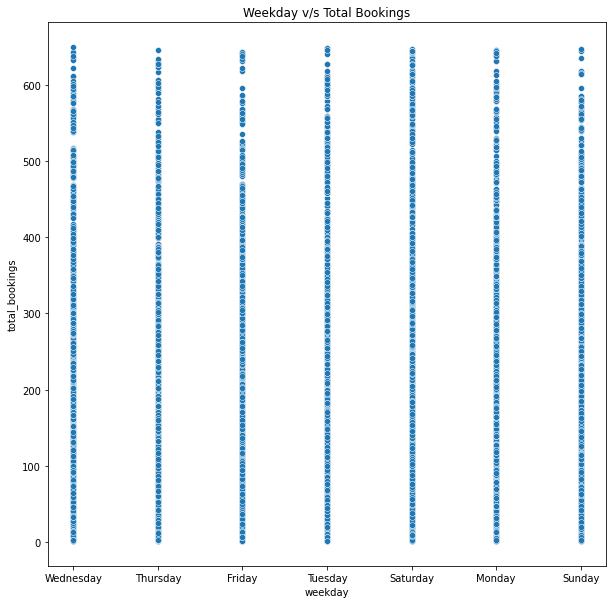

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='weekday', y='total_bookings')
plt.title("Weekday v/s Total Bookings")
plt.show()

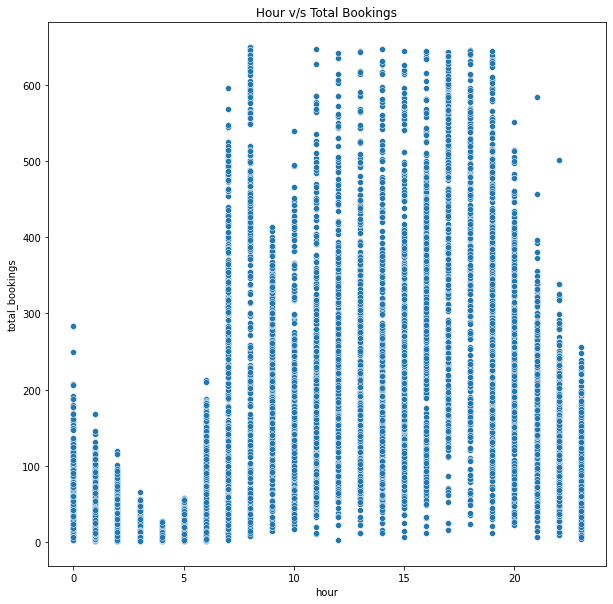

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='hour', y='total_bookings')
plt.title("Hour v/s Total Bookings")
plt.show()

##Histograms for continous variables

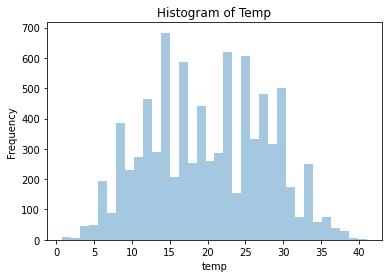

In [ ]:
sns.distplot(df['temp'], kde=False)
plt.title("Histogram of Temp")
plt.ylabel('Frequency')
plt.show()

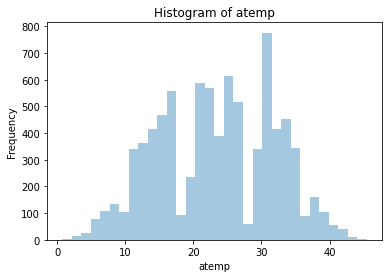

In [ ]:
sns.distplot(df['atemp'], kde=False)
plt.title("Histogram of atemp")
plt.ylabel('Frequency')
plt.show()

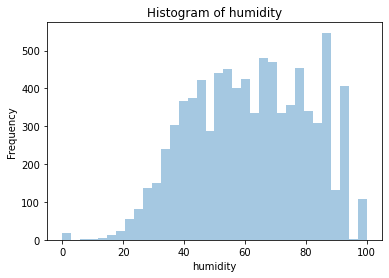

In [ ]:
sns.distplot(df['humidity'], kde=False)
plt.title("Histogram of humidity")
plt.ylabel('Frequency')
plt.show()

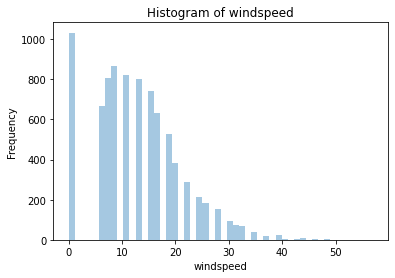

In [ ]:
sns.distplot(df['windspeed'], kde=False)
plt.title("Histogram of windspeed")
plt.ylabel('Frequency')
plt.show()

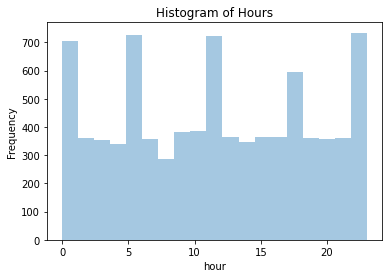

In [ ]:
sns.distplot(df['hour'], kde=False)
plt.title("Histogram of Hours")
plt.ylabel('Frequency')
plt.show()

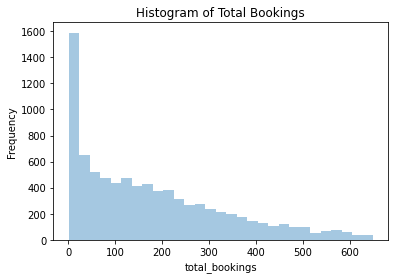

In [ ]:
sns.distplot(df['total_bookings'], kde=False)
plt.title("Histogram of Total Bookings")
plt.ylabel('Frequency')
plt.show()

##Converting the categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        8466 non-null   datetime64[ns]
 1   dates           8466 non-null   object        
 2   hour            8466 non-null   int64         
 3   weekday         8466 non-null   object        
 4   month           8466 non-null   object        
 5   season          8466 non-null   object        
 6   holiday         8466 non-null   int64         
 7   workingday      8466 non-null   int64         
 8   weather         8466 non-null   object        
 9   temp            8466 non-null   float64       
 10  atemp           8466 non-null   float64       
 11  humidity        8466 non-null   int64         
 12  windspeed       8466 non-null   float64       
 13  total_bookings  8466 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
me

In [ ]:
df=pd.get_dummies(df, columns=['weekday', 'month','season', 'weather'])

In [ ]:
df.head()

,datetime,dates,hour,holiday,workingday,temp,atemp,humidity,windspeed,total_bookings,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,2012-05-02,19,0,1,22.14,25.760,77,16.9979,504,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,2012-09-05 04:00:00,2012-09-05,4,0,1,28.70,33.335,79,19.0012,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011-01-13 09:00:00,2011-01-13,9,0,1,5.74,6.060,50,22.0028,139,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2011-11-18 16:00:00,2011-11-18,16,0,1,13.94,16.665,29,8.9981,209,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,2011-09-13 13:00:00,2011-09-13,13,0,1,30.34,33.335,51,19.0012,184,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
X=df.drop(columns=['datetime','dates','total_bookings'], axis=1)

In [ ]:
X.head()

,hour,holiday,workingday,temp,atemp,humidity,windspeed,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,19,0,1,22.14,25.760,77,16.9979,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,4,0,1,28.70,33.335,79,19.0012,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,9,0,1,5.74,6.060,50,22.0028,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,16,0,1,13.94,16.665,29,8.9981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,13,0,1,30.34,33.335,51,19.0012,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
y=df['total_bookings']

##train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=7)

## Training various regression models

### Random_Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_rf= mean_squared_error(y_test, y_pred)
rmse_rf=mse_rf**0.5
rmse_rf

57.937305512513575

### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x= StandardScaler()
sc_y= StandardScaler()

In [ ]:
Y=y.values

In [ ]:
Y=Y.reshape(len(Y),1)

In [ ]:
X_svr= sc_x.fit_transform(X)
y_svr= sc_y.fit_transform(Y)

In [ ]:
x_train, x_test, Y_train, Y_test= train_test_split(X_svr, y_svr, test_size=0.25, random_state=7)

In [ ]:
svr=SVR(kernel='rbf')
svr.fit(x_train, Y_train)

SVR()

In [ ]:
y_pred=svr.predict(x_test)
y_pred=y_pred.reshape(len(y_pred),1)

In [ ]:
Y_test.shape

(2117, 1)

In [ ]:
mse_svr=mean_squared_error(sc_y.inverse_transform(y_pred), sc_y.inverse_transform(Y_test))
rmse_svr=mse_svr**0.5
rmse_svr

112.07594465404543

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred=knn.predict(X_test)
mse_knn= mean_squared_error(y_pred, y_test)
rmse_knn= mse_knn**0.5
rmse_knn

107.37676131753989

### Bagging Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor
rf=RandomForestRegressor()
bag=BaggingRegressor(rf, n_estimators=100)
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100)

In [ ]:
y_pred= bag.predict(X_test)
mse_bag= mean_squared_error(y_pred, y_test)
rmse_bag= mse_bag**0.5
rmse_bag

59.01222267307996

### Ada Boost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
boost= AdaBoostRegressor(rf, n_estimators=50, loss='exponential', random_state=7)
boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), loss='exponential',
                  random_state=7)

In [ ]:
y_pred= boost.predict(X_test)
mse_boost= mean_squared_error(y_pred, y_test)
rmse_boost= mse_boost**0.5
rmse_boost

59.59846591474128

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV # I have used "reg" for Random Forest Regressor!
grid_cv= GridSearchCV(reg,
                   param_grid={"criterion":["squared_error", "poisson"],
                               "max_depth": range(2,30)},
                   cv=5,
                   scoring='neg_root_mean_squared_error',
                   verbose=4)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END criterion=squared_error, max_depth=2;, score=-112.131 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=2;, score=-110.347 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=2;, score=-116.841 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=2;, score=-115.231 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=2;, score=-117.964 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=3;, score=-104.271 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=3;, score=-103.604 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=3;, score=-107.889 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=3;, score=-104.434 total time=   0.5s
[CV 5/5] END criterion=squared_error, max_depth=3;, score=-109.239 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_depth=4;, score=-96.442 total time= 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=7),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': range(2, 30)},
             scoring='neg_root_mean_squared_error', verbose=4)

In [ ]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'squared_error', 'max_depth': 21}
-62.81896374655188


### Customising the parameters according to GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=21)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=21)

In [ ]:
y_pred=rfr.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_rf_bag= mean_squared_error(y_test, y_pred)
rmse_rf_bag=mse_rf_bag**0.5
rmse_rf_bag

58.64021653649202

# Test Data

## Importing the test_data

In [ ]:
data=pd.read_csv("test.csv")
data1=pd.read_csv("test_label.csv", header=None)

In [ ]:
print(data.shape)
print(data1.shape)

(2178, 9)
(2178, 1)


In [ ]:
data['total_bookings']=data1

In [ ]:
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008,256


## Type of data, checking empty values and duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        2178 non-null   object 
 1   season          2178 non-null   object 
 2   holiday         2178 non-null   int64  
 3   workingday      2178 non-null   int64  
 4   weather         2178 non-null   object 
 5   temp            2178 non-null   float64
 6   atemp           2178 non-null   float64
 7   humidity        2178 non-null   int64  
 8   windspeed       2178 non-null   float64
 9   total_bookings  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


In [ ]:
data.isna().any()

datetime          False
season            False
holiday           False
workingday        False
weather           False
temp              False
atemp             False
humidity          False
windspeed         False
total_bookings    False
dtype: bool

In [ ]:
data.duplicated().any()

False

## Extracting the datetime features

In [ ]:
data['datetime']=pd.to_datetime(data['datetime'])
data["weekday"]= data['datetime'].dt.day_name()
data["dates"] =data['datetime'].dt.date
data["hour"]= data['datetime'].dt.hour
data["month"]=data['datetime'].dt.month_name()

In [ ]:
data=data[['datetime', 'dates','hour','weekday', 'month', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',	'windspeed','total_bookings']]

In [ ]:
data.head(1)

,datetime,dates,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,2012-05-10 11:00:00,2012-05-10,11,Thursday,May,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008,256


##Outliers

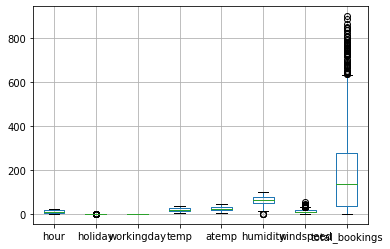

In [ ]:
data.boxplot()
plt.show()

In [ ]:
Q1=data['total_bookings'].quantile(0.25)
Q3=data['total_bookings'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
outlier=data[(data['total_bookings']>(Q3+1.5*IQR)) | (data['total_bookings']<(Q1-1.5*IQR))]

In [ ]:
outlier.shape

(62, 14)

In [ ]:
data.drop(list(outlier.index), axis=0, inplace=True)

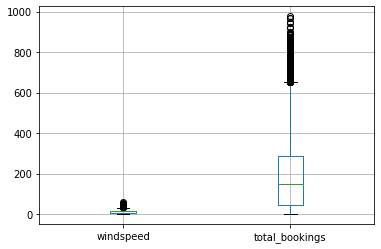

In [ ]:
df.boxplot(['windspeed','total_bookings'])
plt.show()

##Correaltion Analysis and Probability plot

In [ ]:
corr=data.corr()

In [ ]:
corr

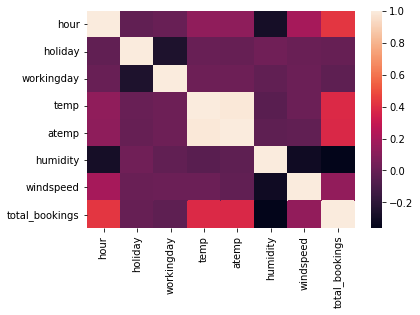

In [ ]:
sns.heatmap(corr)
plt.show()

From above plot and table, it can be observed that

1. "hours" and number_of_booking is significantly &positively correlated with each other.
2. Humidity and number of bookings is negatively correlated 
3. atemp & temp are strongly correlated with each other!
4. Other variables are very weakly correlated with bookings & each other

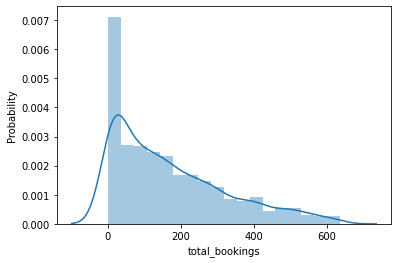

In [ ]:
sns.distplot(data['total_bookings'], norm_hist=True)
plt.ylabel('Probability')
plt.show()

## Scatter-plots & Histograms

**Scatterplots**

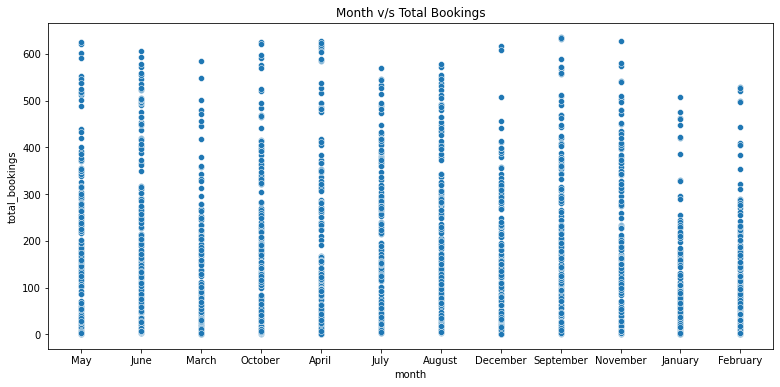

In [ ]:
fig, ax=plt.subplots(figsize=(13,6))
sns.scatterplot(data=data, x='month', y='total_bookings')
plt.title("Month v/s Total Bookings")
plt.show()

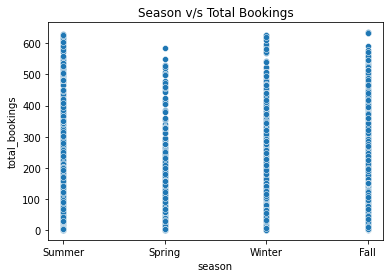

In [ ]:
sns.scatterplot(data=data, x='season', y='total_bookings')
plt.title("Season v/s Total Bookings")
plt.show()

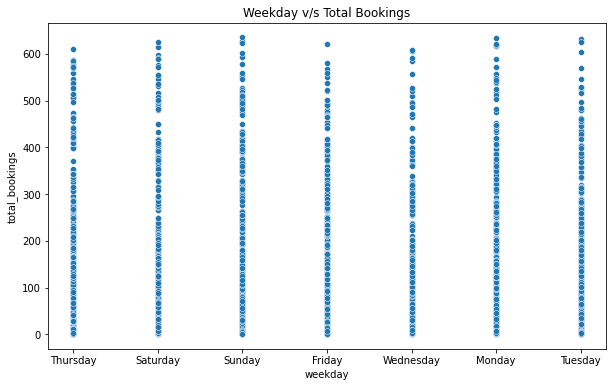

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=data, x='weekday', y='total_bookings')
plt.title("Weekday v/s Total Bookings")
plt.show()

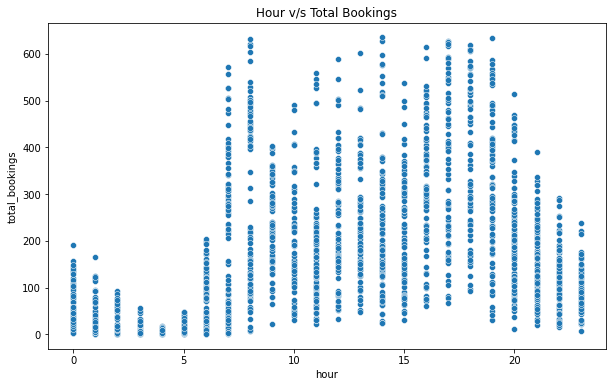

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=data, x='hour', y='total_bookings')
plt.title("Hour v/s Total Bookings")
plt.show()

**Histograms**

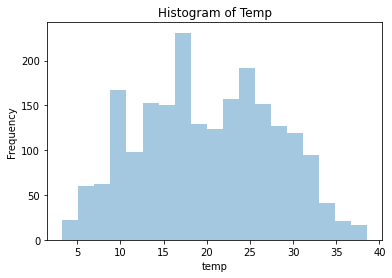

In [ ]:
sns.distplot(data['temp'], kde=False)
plt.title("Histogram of Temp")
plt.ylabel('Frequency')
plt.show()

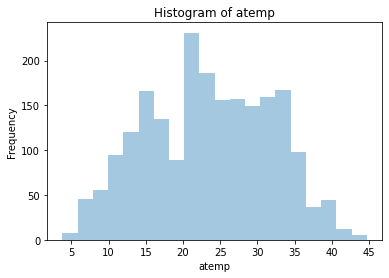

In [ ]:
sns.distplot(data['atemp'], kde=False)
plt.title("Histogram of atemp")
plt.ylabel('Frequency')
plt.show()

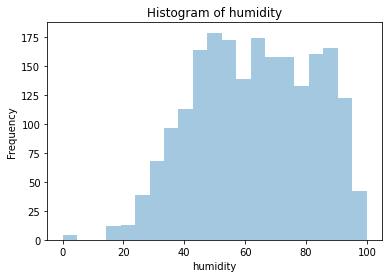

In [ ]:
sns.distplot(data['humidity'], kde=False)
plt.title("Histogram of humidity")
plt.ylabel('Frequency')
plt.show()

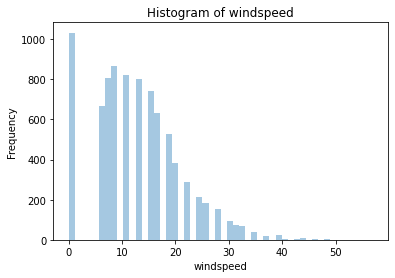

In [ ]:
sns.distplot(df['windspeed'], kde=False)
plt.title("Histogram of windspeed")
plt.ylabel('Frequency')
plt.show()

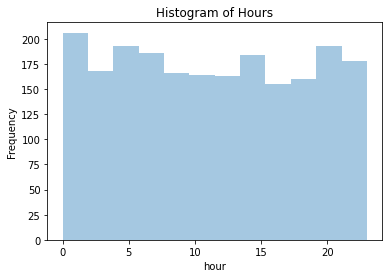

In [ ]:
sns.distplot(data['hour'], kde=False)
plt.title("Histogram of Hours")
plt.ylabel('Frequency')
plt.show()

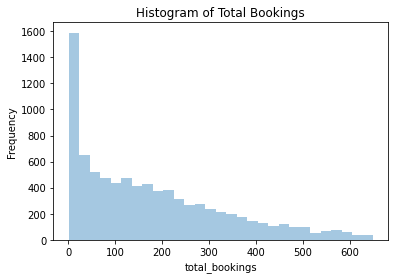

In [ ]:
sns.distplot(df['total_bookings'], kde=False)
plt.title("Histogram of Total Bookings")
plt.ylabel('Frequency')
plt.show()

## Converting the categorical data

In [ ]:
data=pd.get_dummies(data, columns=['weekday', 'month','season', 'weather'])

In [ ]:
X=data.drop(columns=['datetime','dates','total_bookings'], axis=1)

In [ ]:
Y=data['total_bookings']

## Fiittng random forest regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regression=RandomForestRegressor(n_estimators=100, max_depth=21)
regression.fit(X,Y)

RandomForestRegressor(max_depth=21)

In [ ]:
y_pred=regression.predict(X)

## mean_squared_log_error

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(Y, y_pred)

0.0542858154020648